## Assignment_2
### K-Nearest Neighbour Regression Model
* Name: Anurag Banger
* Student Id: 20642433

In [98]:
from pandas.plotting import scatter_matrix
from pandas import read_csv
import pandas as pd
import numpy as np 
from matplotlib import pyplot
import seaborn as seabornInstance 

#Reading the data
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)


(506, 14)


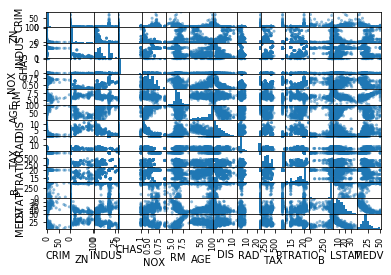

<Figure size 1440x1080 with 0 Axes>

In [99]:
#Describe and Displaying the data
print(dataset.shape)

scatter_matrix(dataset)
pyplot.figure(figsize=(20, 15))
pyplot.show()


In [100]:
print(dataset.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
dataset.corr()


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

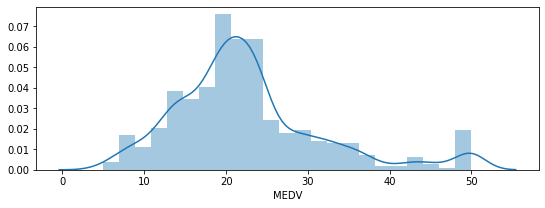

In [6]:
pyplot.figure(figsize=(9,3))
pyplot.tight_layout()
seabornInstance.distplot(dataset['MEDV'])

In [7]:
#Train Test Split
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 85
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [110]:
#KNN, SVC, and LR parameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


In [113]:
#create a new KNN model
knn_cv = KNeighborsRegressor(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train_std, Y_train, cv=6)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}',format(np.mean(cv_scores)))

[0.82105336 0.6195712  0.74470466 0.78805673 0.78792551 0.80417367]
cv_scores mean:{} 0.7609141886383952


In [124]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=6)
#fit model to data
knn_gscv.fit(X_train_std, Y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [125]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [126]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7609141886383952

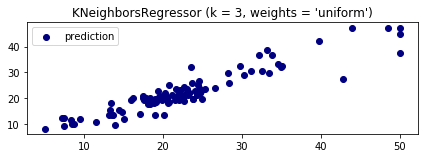

    Actual  Predicted
0     14.8  14.533333
1     22.1  23.233333
2     19.5  19.966667
3     19.2  19.666667
4     19.4  22.833333
5     42.8  27.466667
6     24.4  25.266667
7     23.3  22.066667
8     20.6  18.133333
9     48.5  47.433333
10    33.2  38.633333
11    16.2  20.066667
12     8.3  11.600000
13    23.0  23.566667
14     7.4   9.300000
15    23.2  21.233333
16     7.5  12.466667
17    30.3  29.033333
18    20.4  19.600000
19    18.1  17.633333
20    32.2  36.700000
21    20.5  20.166667
22     9.5  12.066667
23    28.2  29.633333
24    20.7  25.266667
Mean Absolute Error: 2.405228758169934
Mean Squared Error: 11.048692810457515
Root Mean Squared Error: 3.323957402022101
r2_score: 0.8663752332885025
explained variance Score: 0.8671212703325561


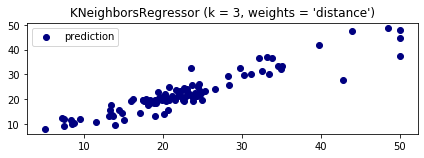

    Actual  Predicted
0     14.8  14.429577
1     22.1  23.296695
2     19.5  19.948124
3     19.2  19.655173
4     19.4  22.990306
5     42.8  27.649959
6     24.4  24.879748
7     23.3  22.058364
8     20.6  15.507271
9     48.5  48.910176
10    33.2  37.118727
11    16.2  20.022242
12     8.3  11.638765
13    23.0  23.889208
14     7.4   9.239357
15    23.2  21.569757
16     7.5  12.004898
17    30.3  29.872230
18    20.4  19.371515
19    18.1  17.668061
20    32.2  36.660045
21    20.5  19.620360
22     9.5  12.036435
23    28.2  29.301961
24    20.7  25.033085
Mean Absolute Error: 2.277490832961668
Mean Squared Error: 10.503144584772654
Root Mean Squared Error: 3.240855532845093
r2_score: 0.8729731861538417
explained variance Score: 0.8736631499908325


In [127]:
# knn Fit regression model

n_neighbors = 3
for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(X_train_std, Y_train)
    Y_pred = knn.predict(X_test_std)
    pyplot.subplot(2, 1, i + 1)
    pyplot.scatter(Y_test, Y_pred, color='navy', label='prediction')
    pyplot.axis('tight')
    pyplot.legend()
    pyplot.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    pyplot.tight_layout()
    pyplot.show()
    df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
    print(df.head(25))
    print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
    print('r2_score:',metrics.r2_score(Y_test,Y_pred))
    print('explained variance Score:',metrics.explained_variance_score(Y_test,Y_pred))
    